### RFM model

### Objective:
- RFM stands for Recency, Frequency, and Monetary Value, and it is a method used in marketing and customer relationship management to analyze and categorize a company's customer base.
- Recency (R): This measures how recently a customer has made a purchase or interacted with the company.
- Frequency (F): Frequency refers to how often a customer makes purchases or interacts with the company.
- Monetary Value (M): Monetary value represents the total amount of money a customer has spent on the company's products or services.
- The objective of customer segmentation is to divide a company's customer base into distinct and homogeneous groups based on shared characteristics, behaviors, and preferences. 
- It enables companies to shift away from generic, one-size-fits-all marketing and service approaches towards more customized and efficient strategies.

In [19]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
Retail= pd.read_excel('Retail.xlsx')
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [22]:
# since the customer id has null values which is more than 5% we cannot replace with mean or median so dopping the null values rows
Retail.dropna(inplace=True)

In [23]:
np.where(Retail.Quantity==0)

(array([], dtype=int64),)

In [24]:
# we have some rows in the Unit price as zero which may be due to mistake in data collection 
# because the quantity is not 0 then how can be the unitprice be 0
np.where(Retail.UnitPrice==0)

(array([  7012,  23071,  26046,  29881,  29883,  35460,  55279,  87903,
         95201,  99945, 109968, 131865, 140517, 199499, 202073, 204627,
        214132, 229359, 229360, 229361, 229362, 262429, 265590, 280386,
        293578, 314491, 327463, 327630, 327992, 329894, 336106, 336738,
        336739, 342114, 342115, 360854, 361225, 362308, 366848, 378894],
       dtype=int64),)

In [25]:
print(Retail.UnitPrice.skew())
print(Retail.UnitPrice.mean())
print(Retail.UnitPrice.median())
# since heavily positively skewed replace with median

452.2190186988453
3.4604710185298773
1.95


In [26]:
Retail.loc[Retail['UnitPrice'] == 0, 'UnitPrice'] = 1.95

In [27]:
np.where(Retail.UnitPrice==0)

(array([], dtype=int64),)

In [28]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [29]:
Retail.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [30]:
Retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [62]:
# calculating recenccy
day="2012-01-01"
day=pd.to_datetime(day)
Retail['InvoiceDate']=pd.to_datetime(Retail["InvoiceDate"])
recency=Retail.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})# x.max(high)means most recent invoice date
recency.head()

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332


In [63]:
# calculating frequency
freq=Retail.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.head(5)
#The result is a pandas Series with "CustomerID" as the index and the count of unique bill numbers as the values.

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [64]:
# calculating monetary
Retail['total']=Retail['Quantity']*Retail['UnitPrice']

In [65]:
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [66]:
total_cost=Retail.groupby('CustomerID')[["total"]].sum()

In [67]:
total_cost.head()

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [68]:
Retail[Retail.CustomerID==12346.0] # returned product

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [69]:
RFM=pd.concat([recency,freq,total_cost], axis=1)
RFM.head()

,InvoiceDate,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40


In [70]:
RFM.columns=['recency','frequency','monetary']

In [71]:
RFM.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40


In [72]:
RFM.dtypes

recency        int64
frequency      int64
monetary     float64
dtype: object

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

In [74]:
scaled

array([[ 2.31656788, -0.32936215, -0.23120385],
       [-0.88904975,  0.20610242,  0.29198279],
       [-0.16456032, -0.11517632, -0.01303867],
       ...,
       [-0.83942719, -0.22226923, -0.20976655],
       [-0.87912524,  1.16993863,  0.02309156],
       [-0.49206924, -0.22226923, -0.00817825]])

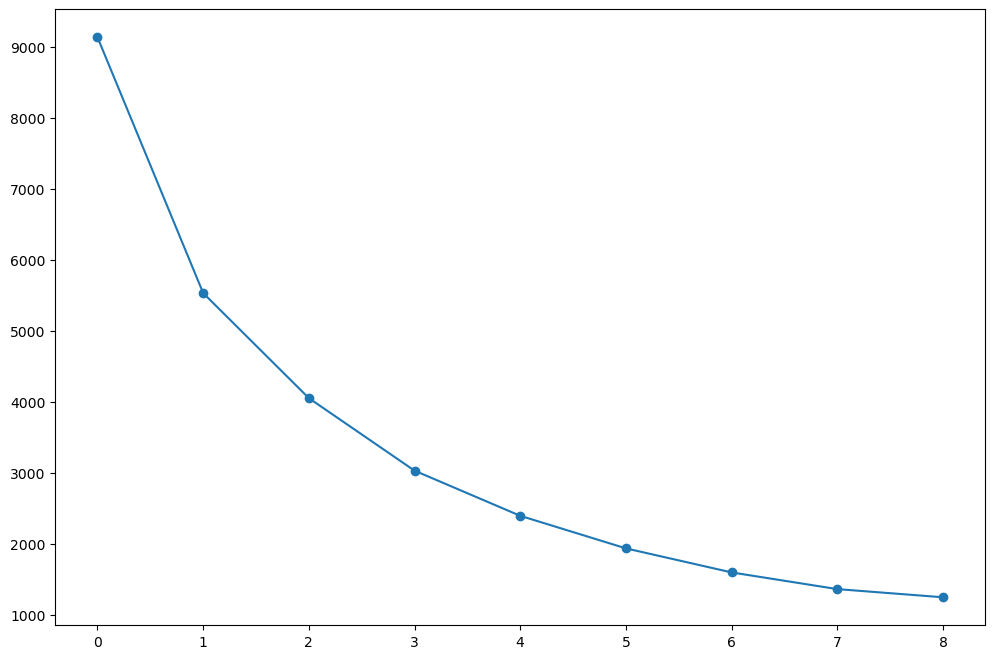

In [75]:
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [76]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [77]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [78]:
RFM

,recency,frequency,monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,2


In [79]:
final=RFM.groupby("Clusters")["recency","frequency","monetary"].mean()
final

,recency,frequency,monetary
Clusters,,,
1,267.719964,1.852755,460.709242
2,61.593084,5.548626,1802.969609
3,27.346154,83.346154,76050.612308


### Recommendation:

We have three types of clusters: low-value (1), mid-value(2), and high-value(3)


Low-Value Customers (Cluster 1):
- High recency (267.72): These customers haven't made a purchase in a while.
- Low frequency (1.85): They make infrequent purchases.
- Low monetary value (460.71): They have low spending.
- These customers are more probable to churn
- Recommendation: Focus on re-engaging these customers with targeted offers or discounts to encourage them to make more frequent and higher-value purchases.

Mid-Value Customers (Cluster 2):

- Moderate recency (61.59): They have made recent purchases but not as recent as Cluster 3.
- Moderate frequency (5.55): They make somewhat frequent purchases.
- Moderate monetary value (1802.97): They have moderate spending.
- Recommendation: These customers are relatively active. Consider providing them with incentives to maintain their engagement and potentially increase their spending.

High-Value Customers (Cluster 3):

- Low recency (27.35): They have made very recent purchases.
- High frequency (83.35): They make frequent purchases.
- High monetary value (76050.61): They are the highest spenders.
- Recommendation: These customers are your elite customers. Focus on providing them with premium services, loyalty rewards, or exclusive offers to maintain their loyalty and maximize their spending.
